Source: https://link.springer.com/article/10.1007/s10462-021-10116-x

Citation: Gupta, N., Gupta, S.K., Pathak, R.K. et al. Human activity recognition in artificial intelligence framework: a narrative review. Artif Intell Rev 55, 4755–4808 (2022). https://doi.org/10.1007/s10462-021-10116-x

Introduction:

Human Activity Recognition has become widely used and valued. But what is human activity recognition? The article entitled, "Human Activity Recognition in Artificial Intelligence Framework: A Narrative Review", would define Human Activity Recognition (HAR) as "the art of identifying and naming activities using Artificial Intelligence (AI) from the gathered activity raw data by utilizing various sources (so-called devices)" (Guptna, N., Gupta, S.K., Pathal, R.K. et al.). In other words, HAR is a machine learning concept that determines what humans are doing any given point in time. This includes walking, running, sitting, standing, walking upstairs, biking, etc. In fact, HAR is used constantly. Iphones tell people how much they walk in a day, apple watches track the amount of physical activity people get, and HAR has found its way in healthcare, surveillance, and remote care to the elderly. 

Source: https://www.tandfonline.com/doi/full/10.1080/24751839.2021.1987706

Citation: Antonios Papaleonidas, Anastasios Panagiotis Psathas & Lazaros Iliadis (2022) High accuracy human activity recognition using machine learning and wearable devices’ raw signals, Journal of Information and Telecommunication, 6:3, 237-253, DOI: 10.1080/24751839.2021.1987706 

Literature Review:

Diverging from the usage of HAR, a big and current topic is how to implement HAR. Since 2006, researchers and computer scientists have implemented different algorithms to determine the best algorithm to use. In the article titled, High Accuracy Human Activity Recognition Using Machine Learning and Wearable Devices’ Raw Signals, the authors explained the history of HAR research and the different algorithms used. First in 2006, Pirttijangas et al. "tested a model that used several multilayer perceptron and k-nearest neighbor’s algorithms to recognize 17 activities to achieve an overall accuracy and 90.61%" (Papaleonidas, Psathas, and Iliadis). In 2011, Casale et al. "used a wearable device and applied a random forest classification algorithm to model five distinct activities (walking, climbing stairs, talking to a person, standing, and working on the computer)", which achieved a 90% accuracy (Papaleonidas, Psathas, and Iliadis). In 2018, Brophy et al. "proposed a hybrid convolutional neural network and an SVM model with an accuracy of 92.3% for four activities (walking and running on a treadmill, low and high resistance bike exercise)" (Papaleonidas, Psathas, and Iliadis). 

There are many ways and many algorithms that people have attempted to implement to find the best and most accurate model for Human Activity Recognition. 

Looking at these different implementations of Human Activity Recognition, we wanted to implement three algorithms, the k-nearest neighbor algorithm, the multilayer perceptron (also known as a fully connected neural network), and a random forest classifier, to determine the best accuracy given our data set. More about our data set can be found below. 

In [1]:
from os import listdir
from pandas import read_csv
import pandas as pd
import numpy as np
import glob
import random
from pandas import DataFrame
from matplotlib import pyplot
from numpy import vstack
from numpy import unique
from sklearn.metrics import accuracy_score

First, let's load in our data set using the three functions below: 

In [2]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a group of files, such as x, y, z data for a given variable and  return them as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset type, such as train or test
def load_dataset(type, prefix=''):
    path = prefix + type + '/Inertial Signals/'
    
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_' + type + '.txt', 'total_acc_y_' + type + '.txt', 'total_acc_z_' + type + '.txt']
    # body acceleration
    filenames += ['body_acc_x_' + type + '.txt', 'body_acc_y_' + type + '.txt', 'body_acc_z_' + type + '.txt']
    # body gyroscope
    filenames += ['body_gyro_x_' + type + '.txt', 'body_gyro_y_' + type + '.txt', 'body_gyro_z_' + type + '.txt']

    # load input data
    X = load_group(filenames, path)
    # load output data
    y = load_file(prefix + type + '/y_'+type+'.txt')
    return X, y

Source: UCI Data Set
Citation: Reyes-Ortiz, Jorge L, et al. “Human Activity Recognition Using Smartphones Dataset.” UCI Machine Learning Repository, Nov. 2013, archive.ics.uci.edu/ml/index.php. 

As we load in the dataset, here is a description of the dataset as found in the ReadMe of the dataset: 

"The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). These signals were used to estimate variables of the feature vector for each pattern: '-XYZ' is used to denote 3-axial signals in the X, Y and Z directions" (Reyes-Ortiz et al.)

Now let's take a closer look at our data:

In [3]:
# summarize the balance of classes in an output variable column
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

In [4]:
# load all train data
print('Training data')
trainX, trainy = load_dataset('train', 'UCI HAR Dataset/')
class_breakdown(trainy)
# load all test data
print('Testing data')
testX, testy = load_dataset('test', 'UCI HAR Dataset/')
class_breakdown(testy)

print('Both')
combined = vstack((trainy, testy))
class_breakdown(combined)

Training data
Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138
Testing data
Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222
Both
Class=1, total=1722, percentage=16.720
Class=2, total=1544, percentage=14.992
Class=3, total=1406, percentage=13.652
Class=4, total=1777, percentage=17.254
Class=5, total=1906, percentage=18.507
Class=6, total=1944, percentage=18.876


We can see above that our data is equally split among the six activities. This is a good sign and tells us there is an equal distribution among the activities. 

In [5]:
# load data
sub_map = load_file('UCI HAR Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
print("The train subjects are:", train_subjects)

The train subjects are: [ 1  3  5  6  7  8 11 14 15 16 17 19 21 22 23 25 26 27 28 29 30]


In [6]:
# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
    # return the selected samples
    return X[ix, :, :], y[ix]

In [7]:
# convert a series of windows to a 1D list
def to_series(windows):
    series = list()
    for window in windows:
        # remove the overlap from the window
        half = int(len(window) / 2) - 1
        for value in window[-half:]:
            series.append(value)
    return series

Now that we have fully loaded in the data and updated the data, we should take a look at what the data looks like. Below, we will plot two distinct graphs. The first graph will consist of two similar graphs from two different subjects. It will show the total acceleration, the body acceleration, and the body gyroscope for each activity over time. 

In [8]:
def plot_subject(X, y, person):
    pyplot.figure()
    n, off = X.shape[2] + 1, 0
    pyplot.suptitle('Person ' + str(person), y = 0.93)

    # total acceleration
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('total acc ' + str(i), y = 0, loc = 'left')
        off += 1
    
    # body acceleration
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body acc ' + str(i), y = 0, loc = 'left')
        off += 1
    
    # body gyro
    for i in range(3):
        pyplot.subplot(n, 1, off + 1)
        pyplot.plot(to_series(X[:, :, off]))
        pyplot.title('body gyro ' + str(i), y = 0, loc = 'left')
        off += 1
    
    pyplot.subplot(n, 1, n)
    pyplot.plot(y)
    pyplot.title('activity', y=0, loc='left')
    pyplot.show()

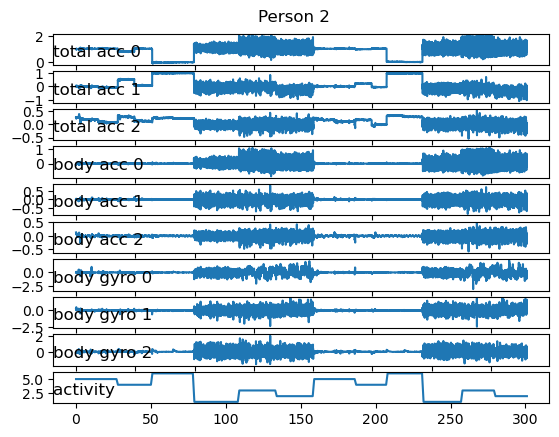

In [9]:
# get the data for one subject
person = random.randint(0, len(train_subjects) - 1)
sub_id = train_subjects[person]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
# plot data for subject
plot_subject(subX, suby, person)

(316, 128, 9) (316, 1)


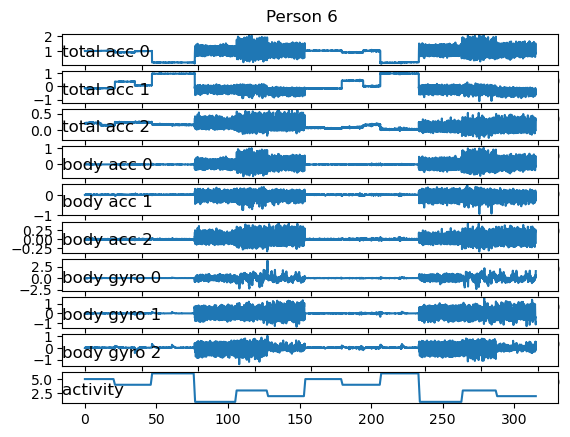

In [10]:
# get the data for one subject
person2 = random.randint(0, len(train_subjects) - 1)
if person2 == person:
    person2 = random.randint(0, len(train_subjects) - 1)
sub_id = train_subjects[person2]
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby, person2)

Within the plots above we see different levels of activity. For the walking activities (walking, walking upstairs, and walking downstairs), which are associated with activities 1, 2, and 3, we see a greater amount of movement compared to activities 4, 5, and 6, which correspond to sitting, standing, and laying. When we see "stagnant" lines, we can correspond that to activities 4, 5, and 6. 

In addition, for both people, the accelerations look very similar as they are completing the same tasks. 

In [11]:
# group data by activity
def data_by_activity(X, y, activities):
    # create a dictionary where the activity is the key, and the subset of X is the value
    result = {}
    for a in activities:
        mask = y[:, 0] == a
        subset_X = X[mask, :, :]
        result[a] = subset_X
    return result


def plot_activity_histograms(X, y):
    # get a list of unique activities for the subject
    activity_ids = unique(y[:,0])
    grouped = data_by_activity(X, y, activity_ids)
    
    # plot histograms per activity
    pyplot.figure()
    pyplot.suptitle('Person ' + str(person) + "'s Total Acceleration for the Different Activities", y = 0.93)
    xaxis = None
    for k in range(len(activity_ids)):
        activ_id = activity_ids[k]

        for i in range(3):
            ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)
            ax.set_xlim(-1,1)
            if k == 0:
                xaxis = ax
            # create histogram subplot by indexing the grouped activities dictionary by activity and total acceleration axis
            pyplot.hist(to_series(grouped[activ_id][:,:,i]), bins=100)
            pyplot.title('activity '+str(activ_id), y=0, loc='left')
    pyplot.show()

/var/folders/sr/jjl_xymn4n71fbh5j4dw1flr0000gn/T/ipykernel_21182/80887460.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = pyplot.subplot(len(activity_ids), 1, k+1, sharex=xaxis)


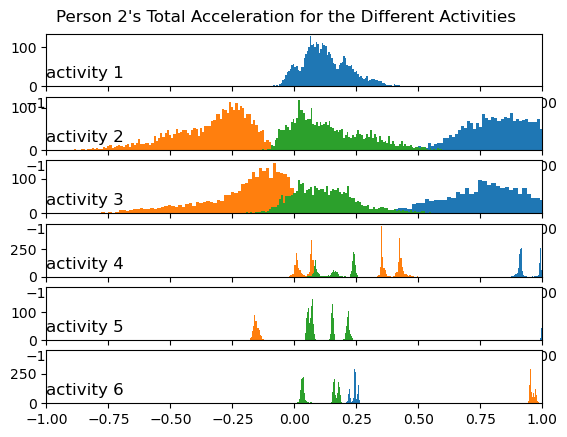

In [12]:
plot_activity_histograms(subX, suby)


Taking a look at the histogram above, we can see the total acceleration for each activity. We can see how some activities look vastly different from each other. For instance, activity 6 (laying down) is extremely different than activity 1 (walking). 

It is also important to not the three colors, which correspond to the three axis. The x-axis is blue, the y-axis is orange, and the z-axis is green. 

Now that we have an understanding of what our data looks like, it is time to run some algorithms. We ran three algorithms on our data.
The first algorithm used was the K-nearest neighbors algorithm. The second algorithm is a fully connected neural network. And the third and last algorithm is a random forest classifier. The three algorithms are imported from sklearn.

The three algorithms are seen below:

In [13]:
# k Nearest Neighbors algorithm (imported from sklearn)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, test_size=0.33, random_state=42)

#Average accuracy of knn for 10 models

knn_models = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.reshape(X_train.shape[0], -1), y_train.ravel())
    y_pred = knn.predict(X_test.reshape(X_test.shape[0], -1))
    knn_models.append(accuracy_score(y_test, y_pred))
print("Highest Accuracy for KNN of Different Sizes:", max(knn_models), "for k =", knn_models.index(max(knn_models))+1)

Highest Accuracy for KNN of Different Sizes: 0.8978162340337865 for k = 1


Explanation of the KNN algorithm: 

We implemented KNN on our data set. We wanted to check which numbers of neighbors has the best accuracy, so we ran it from 1 neigbor till 9 neighbors. We started by splitting the data into train and test data. Then we trained the KNN on the training data (we had to reshape the training data). Finally, we predicted on testing data and got the accuracy score. 

In [17]:
# fully connected neural network (multilayer perceptron)
from sklearn.neural_network import MLPClassifier

#Average accuracy of neural networks for 10 models
mlp_models = []
n_features = trainX.shape[1] * trainX.shape[2]
trainX_mlp = trainX.reshape((trainX.shape[0], n_features))
testX_mlp = testX.reshape((testX.shape[0], n_features))

for i in range(10):
    model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
    model.fit(trainX_mlp, trainy.ravel())
    mlp_models.append(model.score(testX_mlp, testy))
print("Average Accuracy for Neural Networks " + str(np.mean(mlp_models)))

Average Accuracy for Neural Networks 0.8566677977604344


Explanation of the fully connected neural network:
    
Because of randomization in the neural network, we chose to run it 10 times and take the average accuracy. We first loaded in the dataset and then reshaped the train and test data so that if works with the model. We fit the data and found the accuracy score. 

In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Average accuracy of random forest classifier for 10 models

rfc_models = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators = 100)
    rfc.fit(trainX.reshape(len(trainX), -1), trainy.ravel())
    y_pred = rfc.predict(testX.reshape(len(testX), -1))
    rfc_models.append(accuracy_score(testy, y_pred))
print("Average Accuracy for Random Forest Classifier: "+ str(np.mean(rfc_models)))

Average Accuracy for Random Forest Classifier: 0.8451306413301662


Explanation of the random forest classifier: 

Similar to what we did previously to account for randomness, we ran the algorith 10 times and took the average accuracy. We implemented the random forest classifier using 100 trees. We had to reshape the training data before training the data using the algorithm. Then, we predicted the test data and got the accuracy score. 

From the three algorithms above, we can see that the accuracy scores are close in all three algorithms. The K Nearest Neighbors Algorithm produced an accuracy score of 89.8%, the fully connected neural network produced an accuracy score of 85.0%, and the Random Forest Classifier produced an accuracy score of 85%. Given this, KNN seems to be the most accurate algorithm that we have. The other two's performance are about the same.

Source: https://link.springer.com/article/10.1007/s11042-020-09004-3

Citation: Beddiar, D.R., Nini, B., Sabokrou, M. et al. Vision-based human activity recognition: a survey. Multimed Tools Appl 79, 30509–30555 (2020). https://doi.org/10.1007/s11042-020-09004-3

It is important the note the biases associated with our data and model. 

Most would agree that the broad usage fo HAR is used to benefit people's physical health. Most usage includes tracking exercise. However, sometimes these models can also be used in a negative way. In the article titled, Vision-based Human Activity Recognition: A Survey, the researchers found that HAR has been used for surveillance and security. When facial recognition isn't present, human recognition can be used to target people based on things like posture and walking pattern (Beddiar, D.R., Nini, B., Sabokrou, M. et al.). This is obviously very controversial. As we have seen previous with COMPAS, these security measures often target innocent people and are racially biased. 

Furthermore, we found issues associated with our data. Our data only includes people between the ages of 19-48. This can be problematic because it excludes children, many teens, and the elderly, which could make our results skewed. It is also important to note that the data only contains 30 volunteers, which is a very small number and isn't representative of the general population. While not necessarily problematic, it makes our results inaccurate. 

If we had more time, we could vastly improve our project. 

First, we would first run more our data with more algorithms, including convolutional neural networks and a support vector machine. 

Furthermore, I would use other HAR data and run the same algorithms on that data. This would allow us to compare our results to other data sets and see if our results are consistent.

Finally, it would be nice to split the data into window data as opposed to snapshot data and running the algorithms that way. 

Sources:

Gupta, N., Gupta, S.K., Pathak, R.K. et al. Human activity recognition in artificial intelligence framework: a narrative review. Artif Intell Rev 55, 4755–4808 (2022). https://doi.org/10.1007/s10462-021-10116-x

Antonios Papaleonidas, Anastasios Panagiotis Psathas & Lazaros Iliadis (2022) High accuracy human activity recognition using machine learning and wearable devices’ raw signals, Journal of Information and Telecommunication, 6:3, 237-253, DOI: 10.1080/24751839.2021.1987706

Beddiar, D.R., Nini, B., Sabokrou, M. et al. Vision-based human activity recognition: a survey. Multimed Tools Appl 79, 30509–30555 (2020). https://doi.org/10.1007/s11042-020-09004-3

Reyes-Ortiz, Jorge L, et al. “Human Activity Recognition Using Smartphones Dataset.” UCI Machine Learning Repository, Nov. 2013, archive.ics.uci.edu/ml/index.php. 